<a href="https://colab.research.google.com/github/emanuel379/Regressao-I/blob/main/Linear_Regression_for_Business_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import seaborn as sns
import math as m

**Semana 1**

In [ ]:
data = pd.read_excel('Grocery-Store-Sales.xlsx')
data

,Store,Sales per Square Foot ($),Size of Store (in Sq. Ft.),Advertising Dollars,Number of Products Offered in Store
0,1,837,64796,22000,32920
1,2,748,74179,58000,25034
2,3,744,70298,58000,23989
3,4,853,63367,56000,31095
4,5,839,74412,67000,35055
...,...,...,...,...,...
65,66,812,60021,21000,23946
66,67,864,53108,52000,31507
67,68,924,55101,70000,24530
68,69,767,76177,60000,37966


In [ ]:
data.columns

Index(['Store', 'Sales per Square Foot ($)', 'Size of Store (in Sq. Ft.)',
       'Advertising Dollars', 'Number of Products Offered in Store'],
      dtype='object')

In [ ]:
X = data[['Size of Store (in Sq. Ft.)','Advertising Dollars', 'Number of Products Offered in Store']]
y = data.loc[:, 'Sales per Square Foot ($)']

In [ ]:
y

0     837
1     748
2     744
3     853
4     839
     ... 
65    812
66    864
67    924
68    767
69    808
Name: Sales per Square Foot ($), Length: 70, dtype: int64

In [ ]:
X

,Size of Store (in Sq. Ft.),Advertising Dollars,Number of Products Offered in Store
0,64796,22000,32920
1,74179,58000,25034
2,70298,58000,23989
3,63367,56000,31095
4,74412,67000,35055
...,...,...,...
65,60021,21000,23946
66,53108,52000,31507
67,55101,70000,24530
68,76177,60000,37966


In [ ]:
# Add a constant to the independent variables to include the intercept term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Sales per Square Foot ($)   R-squared:                       0.383
Model:                                   OLS   Adj. R-squared:                  0.355
Method:                        Least Squares   F-statistic:                     13.65
Date:                       Fri, 04 Aug 2023   Prob (F-statistic):           5.00e-07
Time:                               00:56:55   Log-Likelihood:                -373.65
No. Observations:                         70   AIC:                             755.3
Df Residuals:                             66   BIC:                             764.3
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

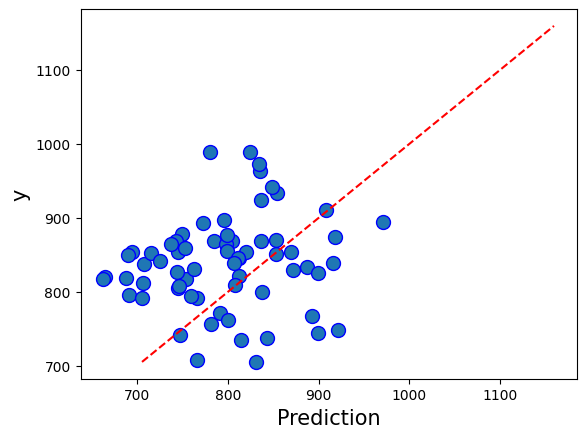

In [ ]:
# divide o conjunto em treinamento e teste
p = 0.95 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

**Semana 2**

In [ ]:
data = pd.read_excel('Final-Exam-Scores.xlsx')
data

,Final Exam Score,Attended Review Session,Mid-Term Score,Homework Score
0,75,No,69,96
1,82,No,87,80
2,88,Yes,71,99
3,83,No,66,79
4,72,Yes,61,70
5,77,No,82,81
6,89,Yes,77,87
7,80,No,89,83
8,92,Yes,82,96
9,84,No,84,81


In [ ]:
data = pd.get_dummies(data)
data

,Final Exam Score,Mid-Term Score,Homework Score,Attended Review Session_No,Attended Review Session_Yes
0,75,69,96,1,0
1,82,87,80,1,0
2,88,71,99,0,1
3,83,66,79,1,0
4,72,61,70,0,1
5,77,82,81,1,0
6,89,77,87,0,1
7,80,89,83,1,0
8,92,82,96,0,1
9,84,84,81,1,0


In [ ]:
data = data.drop(columns=['Attended Review Session_No'])
data

,Final Exam Score,Mid-Term Score,Homework Score,Attended Review Session_Yes
0,75,69,96,0
1,82,87,80,0
2,88,71,99,1
3,83,66,79,0
4,72,61,70,1
5,77,82,81,0
6,89,77,87,1
7,80,89,83,0
8,92,82,96,1
9,84,84,81,0


In [ ]:
data.columns

Index(['Final Exam Score', 'Mid-Term Score', 'Homework Score',
       'Attended Review Session_Yes'],
      dtype='object')

In [ ]:
X = data[['Mid-Term Score', 'Homework Score', 'Attended Review Session_Yes']]
y = data.loc[:, 'Final Exam Score']

In [ ]:
y

0      75
1      82
2      88
3      83
4      72
5      77
6      89
7      80
8      92
9      84
10     90
11     81
12    100
13     92
14     79
15     85
16     94
17     83
18     82
19     86
20     74
21     98
22     73
23     97
24     82
25     97
26     82
27     83
28     98
29     94
30     80
31     73
32     77
33     77
34     83
35     73
36     73
37     95
38     75
39     93
Name: Final Exam Score, dtype: int64

In [ ]:
X

,Mid-Term Score,Homework Score,Attended Review Session_Yes
0,69,96,0
1,87,80,0
2,71,99,1
3,66,79,0
4,61,70,1
5,82,81,0
6,77,87,1
7,89,83,0
8,82,96,1
9,84,81,0


In [ ]:
# Add a constant to the independent variables to include the intercept term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Final Exam Score   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     6.850
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           0.000907
Time:                        00:56:56   Log-Likelihood:                -132.10
No. Observations:                  40   AIC:                             272.2
Df Residuals:                      36   BIC:                             279.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

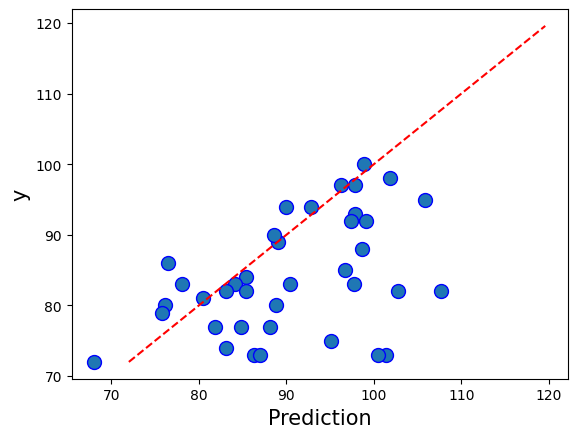

In [ ]:
# divide o conjunto em treinamento e teste
p = 0.95 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

**Semana 3**

In [ ]:
data = pd.read_excel('Sales-by-Territory.xlsx')
data

,Sales Revenue,Territory,Quantity of Orders,Number of Sales Calls
0,21863,East,162,17
1,53633,East,224,22
2,35530,South,271,29
3,23037,West,103,13
4,48444,North,196,23
5,44516,North,151,16
6,62107,South,293,29
7,32030,West,178,15
8,64554,North,293,26
9,30489,East,168,11


In [ ]:
data = pd.get_dummies(data)
data

,Sales Revenue,Quantity of Orders,Number of Sales Calls,Territory_East,Territory_North,Territory_South,Territory_West
0,21863,162,17,1,0,0,0
1,53633,224,22,1,0,0,0
2,35530,271,29,0,0,1,0
3,23037,103,13,0,0,0,1
4,48444,196,23,0,1,0,0
5,44516,151,16,0,1,0,0
6,62107,293,29,0,0,1,0
7,32030,178,15,0,0,0,1
8,64554,293,26,0,1,0,0
9,30489,168,11,1,0,0,0


In [ ]:
data.columns

Index(['Sales Revenue', 'Quantity of Orders', 'Number of Sales Calls',
       'Territory_East', 'Territory_North', 'Territory_South',
       'Territory_West'],
      dtype='object')

In [ ]:
X = data[['Quantity of Orders', 'Number of Sales Calls','Territory_East', 'Territory_North', 'Territory_South']]
y = data.loc[:, 'Sales Revenue']

In [ ]:
y

0     21863
1     53633
2     35530
3     23037
4     48444
5     44516
6     62107
7     32030
8     64554
9     30489
10    41419
11    24665
12    24697
13    61904
14    68702
15    58713
16    58344
17    66771
18    36504
19    36063
20    24289
21    25920
22    37400
23    25162
24    53332
25    58231
26    53215
27    61643
28    61705
29    33798
30    48941
31    66245
32    41581
33    31578
34    29864
35    31880
36    68828
37    61214
Name: Sales Revenue, dtype: int64

In [ ]:
X

,Quantity of Orders,Number of Sales Calls,Territory_East,Territory_North,Territory_South
0,162,17,1,0,0
1,224,22,1,0,0
2,271,29,0,0,1
3,103,13,0,0,0
4,196,23,0,1,0
5,151,16,0,1,0
6,293,29,0,0,1
7,178,15,0,0,0
8,293,26,0,1,0
9,168,11,1,0,0


In [ ]:
# Add a constant to the independent variables to include the intercept term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Sales Revenue   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           3.52e-06
Time:                        00:56:56   Log-Likelihood:                -401.53
No. Observations:                  38   AIC:                             815.1
Df Residuals:                      32   BIC:                             824.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2815.49

In [ ]:
# Get the beta coefficients
beta_intercept = model.params['const']
beta_x = model.params['Territory_South']

print(f"Beta Intercept: {beta_intercept:.2f}")
print(f"Beta for Territory_South: {beta_x:.2f}")

Beta Intercept: -2815.50
Beta for Territory_South: -12240.75


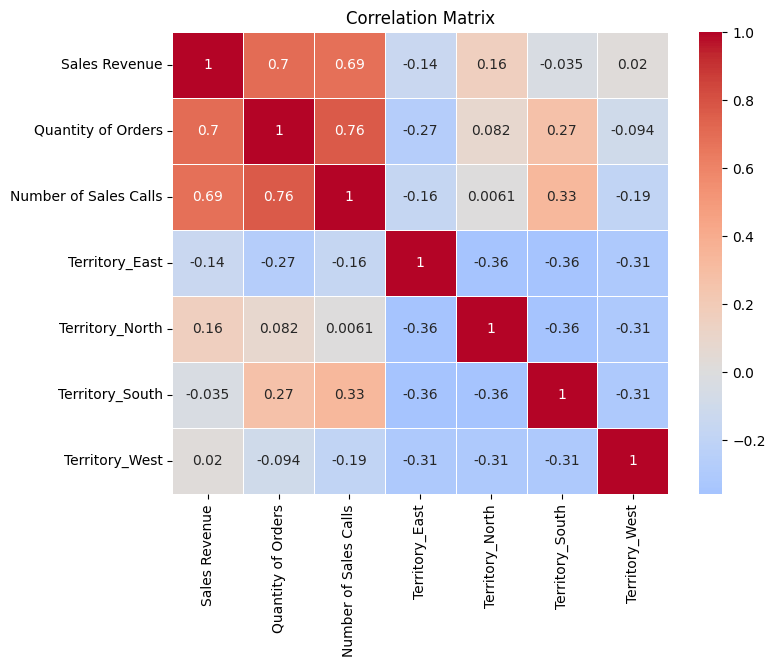

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

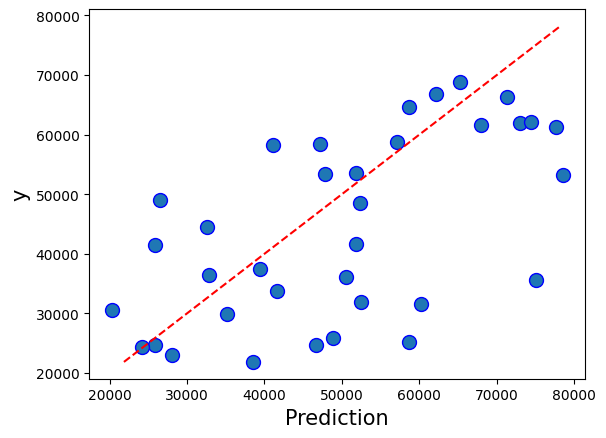

In [ ]:
# divide o conjunto em treinamento e teste
p = 0.92 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

**Semana 4**

In [ ]:
data = pd.read_excel('realestate.xlsx')
data

,PRICE ($),SQFT,BED,BATH,FLOORS,DIST (km)
0,650000.0,1001,2,1,4,1.909
1,380000.0,735,1,1,13,0.128
2,602500.0,790,1,1,4,2.817
3,180000.0,413,0,1,3,2.360
4,320000.0,718,1,1,13,0.128
...,...,...,...,...,...,...
569,1100000.0,1804,2,2,8,2.031
570,550000.0,756,1,1,5,2.061
571,1025000.0,1814,2,3,16,2.439
572,862500.0,1496,2,2,16,2.439


In [ ]:
data['LOGPRICE'] = np.log(data['PRICE ($)'])
data['LOGSQFT'] = np.log(data['SQFT'])
data

,PRICE ($),SQFT,BED,BATH,FLOORS,DIST (km),LOGPRICE,LOGSQFT
0,650000.0,1001,2,1,4,1.909,13.384728,6.908755
1,380000.0,735,1,1,13,0.128,12.847927,6.599870
2,602500.0,790,1,1,4,2.817,13.308843,6.672033
3,180000.0,413,0,1,3,2.360,12.100712,6.023448
4,320000.0,718,1,1,13,0.128,12.676076,6.576470
...,...,...,...,...,...,...,...,...
569,1100000.0,1804,2,2,8,2.031,13.910821,7.497762
570,550000.0,756,1,1,5,2.061,13.217674,6.628041
571,1025000.0,1814,2,3,16,2.439,13.840203,7.503290
572,862500.0,1496,2,2,16,2.439,13.667590,7.310550


In [ ]:
data.columns

Index(['PRICE ($)', 'SQFT', 'BED', 'BATH', 'FLOORS', 'DIST (km)', 'LOGPRICE',
       'LOGSQFT'],
      dtype='object')

In [ ]:
X = data[[ 'LOGSQFT', 'BED', 'BATH', 'FLOORS', 'DIST (km)']]
y = data.loc[:, 'LOGPRICE']

In [ ]:
X

,LOGSQFT,BED,BATH,FLOORS,DIST (km)
0,6.908755,2,1,4,1.909
1,6.599870,1,1,13,0.128
2,6.672033,1,1,4,2.817
3,6.023448,0,1,3,2.360
4,6.576470,1,1,13,0.128
...,...,...,...,...,...
569,7.497762,2,2,8,2.031
570,6.628041,1,1,5,2.061
571,7.503290,2,3,16,2.439
572,7.310550,2,2,16,2.439


In [ ]:
y

0      13.384728
1      12.847927
2      13.308843
3      12.100712
4      12.676076
         ...    
569    13.910821
570    13.217674
571    13.840203
572    13.667590
573    13.270783
Name: LOGPRICE, Length: 574, dtype: float64

In [ ]:
# Add a constant to the independent variables to include the intercept term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               LOGPRICE   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     524.8
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          3.20e-210
Time:                        13:17:41   Log-Likelihood:               -0.75713
No. Observations:                 574   AIC:                             13.51
Df Residuals:                     568   BIC:                             39.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2121      0.258     24.106      0.0

In [ ]:
log_price = 6.2121+ 3*np.log(10)*1.0132 + 0.0369*2 -0.0098*8 + 0.0261*1.2
print(log_price)
m.exp(log_price)

13.237757648664703


561157.9236175632

In [ ]:
#intervalo de confiança

alpha = 0.05

# Get the residuals
residuals = model.resid

# Calculate the standard deviation of the residuals
residual_std = residuals.std()

print(f"Standard deviation of residuals: {residual_std:.2f}")

# Limite inferior
inf = m.exp(log_price - stats.t.ppf(1 - alpha/2, 568)*residual_std)
inf

Standard deviation of residuals: 0.24


348519.21096698835

In [ ]:
data = pd.read_excel('Majors.xlsx')
data

,SALARY,MAJOR,UGPA
0,64057,FINANCE,3.6
1,55111,FINANCE,2.6
2,58018,IB,2.7
3,54426,IB,2.2
4,69205,FINANCE,3.2
5,57582,IB,3.0
6,55206,IB,2.3
7,53322,IB,2.4
8,47870,IB,2.2
9,48000,IB,2.3


In [ ]:
data = pd.get_dummies(data)
data

,SALARY,UGPA,MAJOR_FINANCE,MAJOR_IB
0,64057,3.6,1,0
1,55111,2.6,1,0
2,58018,2.7,0,1
3,54426,2.2,0,1
4,69205,3.2,1,0
5,57582,3.0,0,1
6,55206,2.3,0,1
7,53322,2.4,0,1
8,47870,2.2,0,1
9,48000,2.3,0,1


In [ ]:
data.columns

Index(['SALARY', 'UGPA', 'MAJOR_FINANCE', 'MAJOR_IB'], dtype='object')

In [ ]:
X = data[[ 'UGPA', 'MAJOR_IB']]
y = data.loc[:, 'SALARY']

In [ ]:
X

,UGPA,MAJOR_IB
0,3.6,0
1,2.6,0
2,2.7,1
3,2.2,1
4,3.2,0
5,3.0,1
6,2.3,1
7,2.4,1
8,2.2,1
9,2.3,1


In [ ]:
y

0     64057
1     55111
2     58018
3     54426
4     69205
5     57582
6     55206
7     53322
8     47870
9     48000
10    51754
11    65766
12    57955
13    60817
14    57912
15    61518
16    59704
17    59918
18    59179
19    45800
20    53760
21    46142
22    49650
23    57794
24    63718
25    67909
26    65247
27    64653
28    65029
29    59208
30    52188
31    59345
32    62223
33    51588
34    57087
35    58814
36    66488
37    56402
38    58044
39    62889
40    64181
41    59516
42    54800
43    61401
44    53636
45    49878
46    60924
47    56846
48    55780
49    64609
Name: SALARY, dtype: int64

In [ ]:
# Add a constant to the independent variables to include the intercept term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     43.21
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.25e-11
Time:                        13:20:38   Log-Likelihood:                -476.89
No. Observations:                  50   AIC:                             959.8
Df Residuals:                      47   BIC:                             965.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.73e+04   4152.040     11.392      0.0

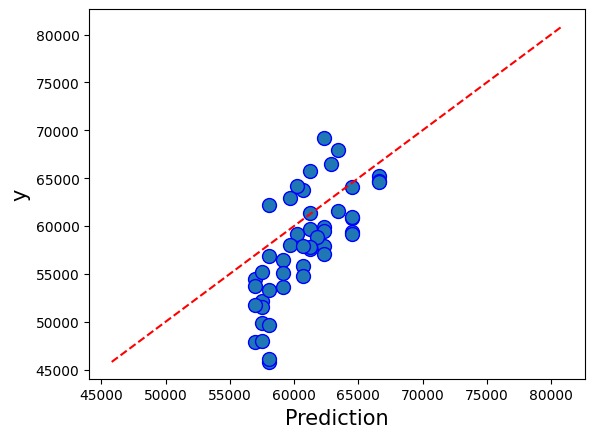

In [ ]:
# divide o conjunto em treinamento e teste
p = 0.96 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

In [ ]:
data['CenterUGPA'] = np.mean(data['UGPA'])  - data['UGPA']
data

,SALARY,UGPA,MAJOR_FINANCE,MAJOR_IB,CenterUGPA
0,64057,3.6,1,0,-0.692
1,55111,2.6,1,0,0.308
2,58018,2.7,0,1,0.208
3,54426,2.2,0,1,0.708
4,69205,3.2,1,0,-0.292
5,57582,3.0,0,1,-0.092
6,55206,2.3,0,1,0.608
7,53322,2.4,0,1,0.508
8,47870,2.2,0,1,0.708
9,48000,2.3,0,1,0.608


In [ ]:
data.columns

Index(['SALARY', 'UGPA', 'MAJOR_FINANCE', 'MAJOR_IB', 'CenterUGPA'], dtype='object')

In [ ]:
X = data[[ 'CenterUGPA', 'MAJOR_IB']]
y = data.loc[:, 'SALARY']

In [ ]:
# Add a constant to the independent variables to include the intercept term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     43.21
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.25e-11
Time:                        13:21:01   Log-Likelihood:                -476.89
No. Observations:                  50   AIC:                             959.8
Df Residuals:                      47   BIC:                             965.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.063e+04    821.531     73.801      0.0

In [ ]:
data['interaction'] = data['CenterUGPA']*data['MAJOR_IB']
data

,SALARY,UGPA,MAJOR_FINANCE,MAJOR_IB,CenterUGPA,interaction
0,64057,3.6,1,0,-0.692,-0.000
1,55111,2.6,1,0,0.308,0.000
2,58018,2.7,0,1,0.208,0.208
3,54426,2.2,0,1,0.708,0.708
4,69205,3.2,1,0,-0.292,-0.000
5,57582,3.0,0,1,-0.092,-0.092
6,55206,2.3,0,1,0.608,0.608
7,53322,2.4,0,1,0.508,0.508
8,47870,2.2,0,1,0.708,0.708
9,48000,2.3,0,1,0.608,0.608


In [ ]:
X = data[[ 'CenterUGPA', 'MAJOR_IB', 'interaction']]
y = data.loc[:, 'SALARY']

In [ ]:
# Add a constant to the independent variables to include the intercept term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     35.67
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           4.59e-12
Time:                        13:21:15   Log-Likelihood:                -472.92
No. Observations:                  50   AIC:                             953.8
Df Residuals:                      46   BIC:                             961.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.142e+04    816.835     75.190      

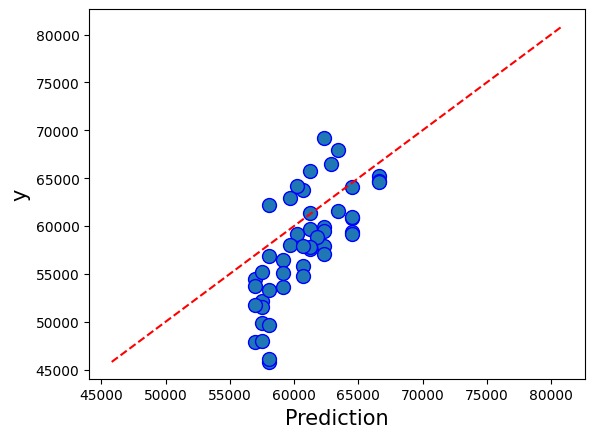

In [ ]:
# divide o conjunto em treinamento e teste
p = 0.96 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')

**Outros**

In [ ]:
data = {
    'Distance': [
        243.2, 254.5, 253.1, 228.1, 240.8, 244.0, 257.9, 255.8, 249.9, 251.3,
        244.4, 246.6, 239.2, 236.2, 267.7, 235.3, 249.1, 239.4, 244.2, 259.7,
        268.5, 248.2, 247.2, 236.8, 238.2, 229.3, 253.1, 252.0, 259.4, 226.7,
        254.6, 249.0, 244.8, 246.3, 248.2, 237.4, 245.4, 245.2, 243.8, 251.2,
        255.9, 235.3, 258.1, 242.5, 244.3, 251.0, 263.6, 246.3, 254.3, 242.6,
        246.9, 243.3, 243.5, 236.6, 239.4, 249.3, 253.6, 268.0, 246.1, 246.1,
        253.9, 248.8, 246.7, 246.5, 250.2, 248.4, 252.0, 238.7, 261.5, 261.1,
        232.1, 257.2, 243.0, 242.7, 249.7, 247.0, 233.7, 243.7, 244.0, 244.0,
        252.8, 250.2, 237.8, 224.8, 253.7, 242.6, 261.5, 235.4, 242.3, 269.5,
        248.1, 244.9, 240.9, 266.2, 254.2, 241.9, 237.4, 240.4, 238.1, 246.9,
        237.8, 243.6, 242.1, 255.7, 249.5, 253.2, 247.9, 244.9, 256.9, 229.9,
        248.1, 257.9, 232.7, 240.7, 245.7, 243.0, 257.9, 258.4, 239.9, 246.8,
        250.8, 251.9, 238.6, 255.7, 242.4, 241.1, 251.4, 254.6, 232.8, 243.0,
        261.2, 237.8, 255.3, 249.4, 239.6, 240.7, 247.6, 240.8, 243.0, 268.8,
        250.2, 237.7, 254.8, 235.2, 265.8, 241.0, 256.4, 240.9, 225.1, 225.8,
        231.1, 262.5, 250.4, 266.4, 242.6, 245.3, 230.6
    ],
    'Accuracy': [
        67.0, 70.1, 59.3, 70.4, 69.5, 69.0, 66.3, 68.3, 63.5, 70.3,66.0, 70.1,
        68.6, 56.9, 67.2, 75.5, 64.2, 65.8, 65.6, 68.5, 54.2, 68.4, 71.8, 67.8,
        65.3, 73.1, 65.1, 70.8, 65.4, 72.1, 66.9, 74.0, 69.9, 70.2, 60.4, 73.6,
        69.3, 73.5, 75.5, 64.5, 71.7, 69.5, 58.3, 69.4, 71.0, 67.5, 68.3, 69.3,
        62.4, 64.7,67.7, 68.4, 70.2, 73.8, 75.8, 70.4, 64.3, 60.9, 74.9, 72.8,
        71.3, 60.5, 68.6, 71.2, 66.6, 59.4, 63.1, 70.7, 68.4, 61.0, 66.7, 60.8, 57.9,
        64.9, 70.9, 59.9, 77.7, 62.6, 73.5, 62.4, 50.3, 66.0, 74.6, 72.6, 55.6,
        73.9, 62.7, 58.4, 62.6, 66.0, 65.3, 72.4, 73.1, 59.9, 64.8, 76.8, 79.8,
        78.5, 71.7, 52.2, 73.0, 71.9, 73.3, 53.9, 65.8, 62.6, 68.8, 73.5, 62.1,
        77.0, 63.1, 68.1, 71.2, 66.9, 71.5, 59.2, 65.6, 65.4, 61.9, 73.4, 70.2,
        66.6, 68.6, 66.5, 70.4, 65.4, 61.3, 61.9,75.6, 70.0, 67.0, 71.4, 70.8,
        64.7, 62.7, 69.2, 70.3, 71.5, 78.8, 59.3, 65.7, 72.0, 67.6, 78.4, 66.9,
        70.2, 66.4, 66.5,78.2, 49.3, 70.4, 63.9, 68.4, 62.0, 70.0, 66.2, 78.8
    ],
    'Gender': 157*[1]
}

# Create a DataFrame from the dictionary
data = pd.DataFrame(data)
data

,Distance,Accuracy,Gender
0,243.2,67.0,1
1,254.5,70.1,1
2,253.1,59.3,1
3,228.1,70.4,1
4,240.8,69.5,1
...,...,...,...
152,250.4,68.4,1
153,266.4,62.0,1
154,242.6,70.0,1
155,245.3,66.2,1


In [ ]:
X = data[['Distance']]
y = data.loc[:, 'Accuracy']

In [ ]:
# Add a constant to the independent variables to include the intercept term
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Accuracy   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     33.61
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           3.66e-08
Time:                        12:57:08   Log-Likelihood:                -482.00
No. Observations:                 157   AIC:                             968.0
Df Residuals:                     155   BIC:                             974.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.8933     10.928     11.978      0.0

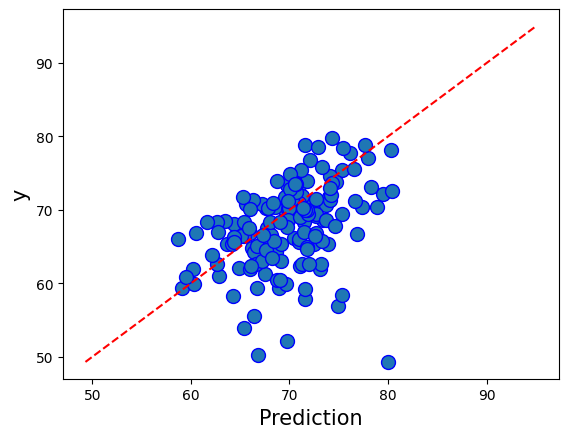

In [ ]:
# divide o conjunto em treinamento e teste
p = 0.96 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
fig.savefig('regression-LR.jpg')